In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv("features/ff_c6.csv")

# Save to a CSV file
molecules = df['Mol'].values


molecules = molecules
molecules


%store -r res
res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 5.560246204451975,
 17.144355598718082,
 25.027177715806825,
 22.814559268959076,
 25.719392847659723,
 10.553895436793855,
 15.857470042410599,
 1.096295429346349,
 3.966428089692199]

In [ ]:
# Add the 'res' list as a new column to the DataFrame

# df['sqrt_Pol_A'] = np.sqrt(df['Pol_A'])
# df['sqrt_Pol_C'] = np.sqrt(df['Pol_C'])
# df['sum_Pol'] =df['Pol_A'] + df['Pol_C']
# df['sqrt_sum_Pol'] = np.sqrt(df['sum_Pol'])

# df['Sum_RadV'] = df['RadV_A'] + df['RadV_C']

# df['sqrt_sum_RadV'] = np.sqrt(df['RadV_A'] + df['RadV_C'])

df['res'] = res
df.drop(columns=['Mol','f1','f2','f3','f4'])
# df = df.drop(columns=['Mol','Ion_A','Ion_C','Pol_A','Pol_C'])
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

          RadV_C    RadV_A      CN_C      CN_A      EA_C        f1        f2  \
RadV_C  1.000000 -0.248441  0.006554  0.439194  0.012804  0.907276  0.909501   
RadV_A -0.248441  1.000000  0.329897 -0.693893  0.175191 -0.371713 -0.176590   
CN_C    0.006554  0.329897  1.000000 -0.522133  0.112754  0.017207  0.018783   
CN_A    0.439194 -0.693893 -0.522133  1.000000  0.299638  0.563788  0.411074   
EA_C    0.012804  0.175191  0.112754  0.299638  1.000000  0.094428  0.045121   
f1      0.907276 -0.371713  0.017207  0.563788  0.094428  1.000000  0.915373   
f2      0.909501 -0.176590  0.018783  0.411074  0.045121  0.915373  1.000000   
f3     -0.098169  0.337866 -0.521030  0.183056  0.368154 -0.162207 -0.025757   
f4     -0.108318  0.355179 -0.502689  0.168881  0.385607 -0.165100 -0.029100   
R_C     0.930264 -0.354827 -0.029097  0.545547 -0.003572  0.958200  0.903228   
R_A    -0.252814  0.796924  0.376793 -0.587833  0.304361 -0.363553 -0.256567   
res    -0.009484  0.236746  0.457602 -0.

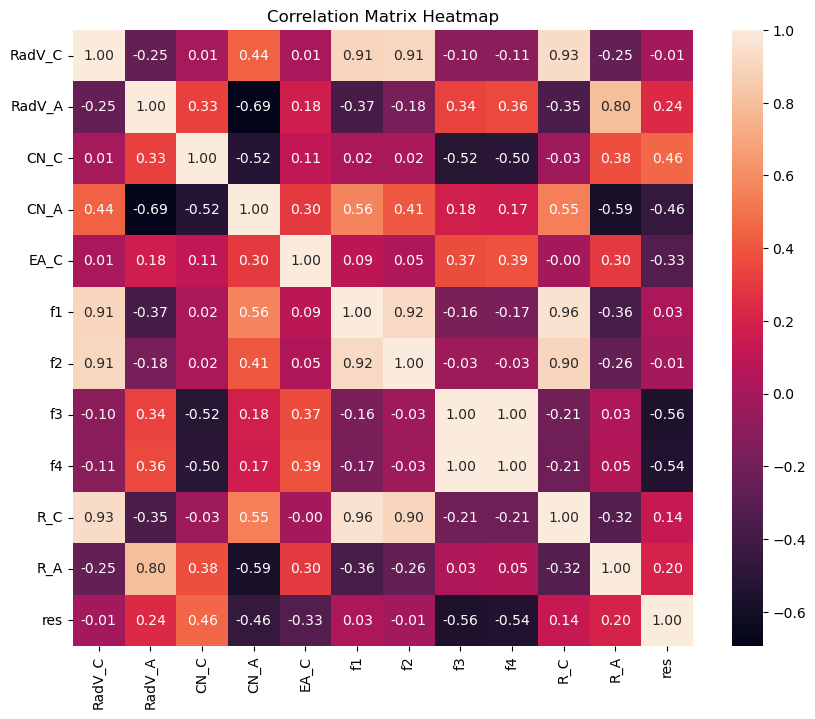

In [ ]:
# Create a heatmap of the correlation matrix


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [150]:
# Replace -1 in f3 with values from f1
df['f3'] = df['f3'].where(df['f3'] != -1, df['f1'])

# Replace -1 in f4 with values from f3-
df['f4'] = df['f4'].where(df['f4'] != -1, df['f3'] - 1)

In [151]:
df

,RadV_C,RadV_A,CN_C,CN_A,EA_C,f1,f2,f3,f4,R_C,R_A,res
0,1.7478,1.0912,6,6,0.7540,1163.0000,85.3197,7.5916,3.0000,1.6000,0.4267,14.133308
1,1.8541,1.0912,6,6,0.7540,1608.0000,186.1052,7.5916,3.0000,1.8667,0.4267,14.081370
2,2.1206,1.0912,6,6,0.7540,4984.5000,338.0207,7.5916,3.0000,2.3467,0.4267,14.034265
3,2.3088,1.0912,6,6,0.7540,6138.7755,476.2591,7.5916,3.0000,2.5200,0.4267,12.926169
4,2.5283,1.0912,6,6,0.7540,9330.7298,649.0924,7.5916,3.0000,2.7867,0.4267,12.272122
5,2.5283,1.5523,8,8,3.6170,9330.7298,649.0924,92.3460,90.3985,2.7867,1.3200,3.230739
6,1.7478,1.5523,6,6,3.6170,1163.0000,85.3197,92.3460,90.3985,1.6000,1.3200,5.121300
7,1.6504,1.8690,4,4,3.0590,337.1808,174.9900,351.9667,358.4995,1.3400,1.0000,3.573920
8,1.7478,1.1498,6,6,3.3390,1163.0000,85.3197,9.6900,7.1341,1.6000,1.7600,4.715887
9,1.6155,1.6554,4,4,0.0000,340.5213,153.4500,134.0060,125.8100,1.4530,1.3600,2.499976


In [152]:
## combintaions of f1 f2 f2 f4
df['f5'] = df['f1'] + df['f2']
df['f6'] = df['f3'] + df['f4']
df['f7'] = abs(df['f1'] - df['f2'])
df['f8'] = abs(df['f3'] - df['f4'])

df['f9'] = df['f1']/df['f2']
df['f10'] = df['f3']/df['f4']

df['f11'] = df['f1']*df['f2']
df['f12'] = df['f3']*df['f4']

df['f13'] = df['f1']**2
df['f14'] = df['f2']**2

df['f15'] = df['f3']**2
df['f16'] = df['f4']**2

df['f17'] = 1/df['f9']
df['f18'] = 1/df['f10']


# df['ratio_cat'] = df['f1']/df['f2']
# df['ratio_an'] = df['f3']/df['f4']

df = df[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18']]
df['res'] = res

C:\Users\user\AppData\Local\Temp\ipykernel_14640\3390257626.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res'] = res


In [153]:
correlation_matrix = df.corr()


In [154]:
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,res
0,1163.0000,85.3197,7.5916,3.0000,1248.3197,10.5916,1077.6803,4.5916,13.631084,2.530533,9.922681e+04,2.277480e+01,1.352569e+06,7279.451208,5.763239e+01,9.000000e+00,0.073362,0.395174,14.133308
1,1608.0000,186.1052,7.5916,3.0000,1794.1052,10.5916,1421.8948,4.5916,8.640274,2.530533,2.992572e+05,2.277480e+01,2.585664e+06,34635.145467,5.763239e+01,9.000000e+00,0.115737,0.395174,14.081370
2,4984.5000,338.0207,7.5916,3.0000,5322.5207,10.5916,4646.4793,4.5916,14.746138,2.530533,1.684864e+06,2.277480e+01,2.484524e+07,114257.993628,5.763239e+01,9.000000e+00,0.067814,0.395174,14.034265
3,6138.7755,476.2591,7.5916,3.0000,6615.0346,10.5916,5662.5164,4.5916,12.889571,2.530533,2.923648e+06,2.277480e+01,3.768456e+07,226822.730333,5.763239e+01,9.000000e+00,0.077582,0.395174,12.926169
4,9330.7298,649.0924,7.5916,3.0000,9979.8222,10.5916,8681.6374,4.5916,14.375041,2.530533,6.056506e+06,2.277480e+01,8.706252e+07,421320.943738,5.763239e+01,9.000000e+00,0.069565,0.395174,12.272122
5,9330.7298,649.0924,92.3460,90.3985,9979.8222,182.7445,8681.6374,1.9475,14.375041,1.021543,6.056506e+06,8.347940e+03,8.706252e+07,421320.943738,8.527784e+03,8.171889e+03,0.069565,0.978911,3.230739
6,1163.0000,85.3197,92.3460,90.3985,1248.3197,182.7445,1077.6803,1.9475,13.631084,1.021543,9.922681e+04,8.347940e+03,1.352569e+06,7279.451208,8.527784e+03,8.171889e+03,0.073362,0.978911,5.121300
7,337.1808,174.9900,351.9667,358.4995,512.1708,710.4662,162.1908,6.5328,1.926858,0.981777,5.900327e+04,1.261799e+05,1.136909e+05,30621.500100,1.238806e+05,1.285219e+05,0.518980,1.018561,3.573920
8,1163.0000,85.3197,9.6900,7.1341,1248.3197,16.8241,1077.6803,2.5559,13.631084,1.358265,9.922681e+04,6.912943e+01,1.352569e+06,7279.451208,9.389610e+01,5.089538e+01,0.073362,0.736233,4.715887
9,340.5213,153.4500,134.0060,125.8100,493.9713,259.8160,187.0713,8.1960,2.219103,1.065146,5.225299e+04,1.685929e+04,1.159548e+05,23546.902500,1.795761e+04,1.582816e+04,0.450633,0.938839,2.499976


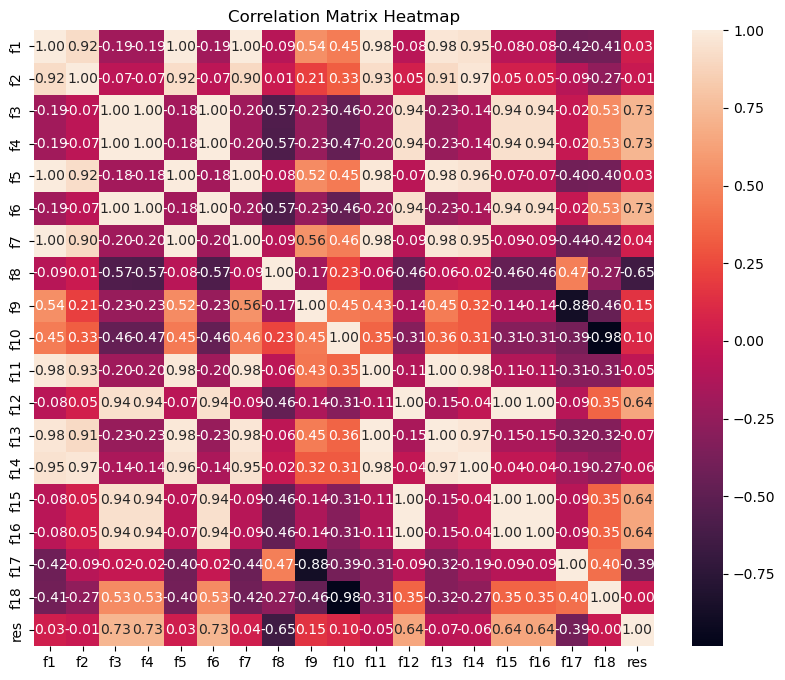

In [155]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [156]:
import pandas as pd
import numpy as np

In [157]:
df = pd.read_csv("features/ff_c6.csv")

In [158]:
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,f1,f2,f3,f4,R_C,R_A
0,LiH,164.10,4.51,1.7478,1.0912,6,6,5.3920,13.590,0.7540,1163.0000,85.3197,7.5916,3.0000,1.6000,0.4267
1,NaH,162.70,4.51,1.8541,1.0912,6,6,5.1390,13.590,0.7540,1608.0000,186.1052,7.5916,3.0000,1.8667,0.4267
2,KH,289.70,4.51,2.1206,1.0912,6,6,4.3410,13.590,0.7540,4984.5000,338.0207,7.5916,3.0000,2.3467,0.4267
3,RbH,319.80,4.51,2.3088,1.0912,6,6,4.1770,13.590,0.7540,6138.7755,476.2591,7.5916,3.0000,2.5200,0.4267
4,CsH,400.60,4.51,2.5283,1.0912,6,6,3.8490,13.590,0.7540,9330.7298,649.0924,7.5916,3.0000,2.7867,0.4267
5,CsCl,400.60,14.60,2.5283,1.5523,8,8,3.8490,12.960,3.6170,9330.7298,649.0924,92.3460,90.3985,2.7867,1.3200
6,LiCl,164.10,14.60,1.7478,1.5523,6,6,5.3920,12.960,3.6170,1163.0000,85.3197,92.3460,90.3985,1.6000,1.3200
7,CuI,46.50,32.90,1.6504,1.8690,4,4,7.7260,10.451,3.0590,337.1808,174.9900,351.9667,358.4995,1.3400,1.0000
8,LiF,164.10,3.74,1.7478,1.1498,6,6,5.3920,17.423,3.3390,1163.0000,85.3197,9.6900,7.1341,1.6000,1.7600
9,ZnS,38.67,19.40,1.6155,1.6554,4,4,9.3940,10.360,0.0000,340.5213,153.4500,134.0060,125.8100,1.4530,1.3600


In [159]:
df['prop'] = -np.power((df['f1']+df['f2'])/2*(df['f3']+df['f4'])/2,1/2)/np.power(df['R_C']+df['R_A'],6)*10

In [160]:
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,f1,f2,f3,f4,R_C,R_A,prop
0,LiH,164.10,4.51,1.7478,1.0912,6,6,5.3920,13.590,0.7540,1163.0000,85.3197,7.5916,3.0000,1.6000,0.4267,-8.296156
1,NaH,162.70,4.51,1.8541,1.0912,6,6,5.1390,13.590,0.7540,1608.0000,186.1052,7.5916,3.0000,1.8667,0.4267,-4.736918
2,KH,289.70,4.51,2.1206,1.0912,6,6,4.3410,13.590,0.7540,4984.5000,338.0207,7.5916,3.0000,2.3467,0.4267,-2.608762
3,RbH,319.80,4.51,2.3088,1.0912,6,6,4.1770,13.590,0.7540,6138.7755,476.2591,7.5916,3.0000,2.5200,0.4267,-2.021628
4,CsH,400.60,4.51,2.5283,1.0912,6,6,3.8490,13.590,0.7540,9330.7298,649.0924,7.5916,3.0000,2.7867,0.4267,-1.476466
5,CsCl,400.60,14.60,2.5283,1.5523,8,8,3.8490,12.960,3.6170,9330.7298,649.0924,92.3460,90.3985,2.7867,1.3200,-1.407653
6,LiCl,164.10,14.60,1.7478,1.5523,6,6,5.3920,12.960,3.6170,1163.0000,85.3197,92.3460,90.3985,1.6000,1.3200,-3.852636
7,CuI,46.50,32.90,1.6504,1.8690,4,4,7.7260,10.451,3.0590,337.1808,174.9900,351.9667,358.4995,1.3400,1.0000,-18.371896
8,LiF,164.10,3.74,1.7478,1.1498,6,6,5.3920,17.423,3.3390,1163.0000,85.3197,9.6900,7.1341,1.6000,1.7600,-0.503574
9,ZnS,38.67,19.40,1.6155,1.6554,4,4,9.3940,10.360,0.0000,340.5213,153.4500,134.0060,125.8100,1.4530,1.3600,-3.615226
